In [1]:
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



In [2]:
from codice_py.etl import df_players, df_appearances, df_club_games, df_clubs, df_competitions, df_game_events, df_game_lineups,\
                          df_games, df_player_valuations
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Il file ../csv\appearances.csv esiste.
Il file ../csv\clubs.csv esiste.
Il file ../csv\club_games.csv esiste.
Il file ../csv\competitions.csv esiste.
Il file ../csv\games.csv esiste.
Il file ../csv\game_events.csv esiste.
Il file ../csv\game_lineups.csv esiste.
Il file ../csv\players.csv esiste.
Il file ../csv\player_valuations.csv esiste.


c:\Users\mikdr\OneDrive - Università Politecnica delle Marche\Data Science\ProgettoDS_PY\DataScience-Python\DataScience-Python\codice\codice_py\etl.py:44: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_game_lineups = pd.read_csv(percorso_csv + "/game_lineups.csv")


                         game_lineups_id  game_id  club_id             type  \
0       3b0a25b9c76eedd7f6faaec061abf671  3606208      338  starting_lineup   
1       cb6eeedb9f728570615d37b6fe7facaf  3606208      338  starting_lineup   
2       ef88b1c4d61884ed8a5b2640d05a2dcd  3606208      338  starting_lineup   
3       baa0d6827dab4fab07d8dc1604e720a7  3606208      338  starting_lineup   
4       1715ec342bf902522b69322a036a3f29  3606208      338  starting_lineup   
...                                  ...      ...      ...              ...   
140315  f62e8310b6b6183961db0c3b32b94ddf  4243187      828      substitutes   
140316  dd066717338d299138c100b5e9584364  4243187      828      substitutes   
140317  12b990a69f1ffdab9aefa42bfda7b2e3  4243187      828      substitutes   
140318  4b43f9ddc4689376f0d7e6151458918a  4243187      828      substitutes   
140319  e66695a529986579822ecae6c34746d9  4243187      828      substitutes   

        player_id        player_name  team_captain 

[NbConvertApp] Converting notebook etl.ipynb to script
[NbConvertApp] Writing 9408 bytes to codice_py\etl.py


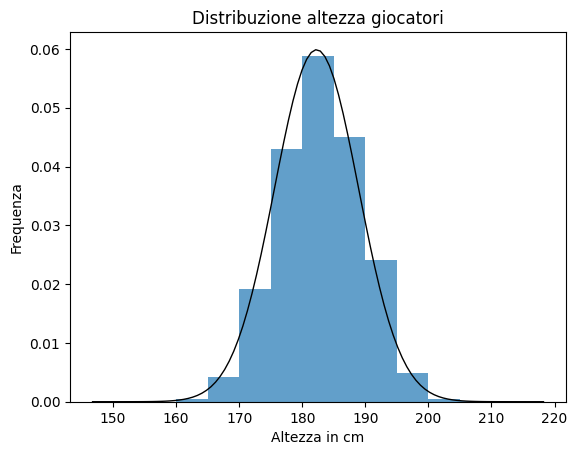

In [3]:
from scipy.stats import norm
plt.figure()
plt.hist(df_players["height_in_cm"], bins=np.arange(150, 220, 5), alpha=0.7, density = True)

#Parametri della distribuzione normale
mu, std = norm.fit(df_players['height_in_cm'])

# Curva di approssimazione
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)


plt.xlabel("Altezza in cm")
plt.ylabel("Frequenza")
plt.title("Distribuzione altezza giocatori")
plt.savefig("../images/distribuzione_altezza_giocatori_histo.png")

In [4]:
%pip install geopandas matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



In [5]:
import pandas as pd

184.53801450843653
6.105802005722981
181.17161351203904
6.3759386906289075


C:\Users\mikdr\AppData\Local\Temp\ipykernel_19712\271043295.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=1, color ="blue")
C:\Users\mikdr\AppData\Local\Temp\ipykernel_19712\271043295.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=1, color = "orange")


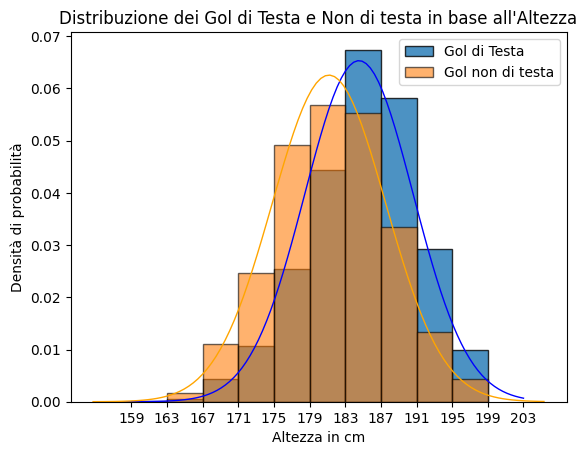

In [6]:
from scipy.stats import norm
df_head_goal = pd.merge(df_players, df_game_events[df_game_events["description"].notna() & df_game_events['description'].str.contains('Header')], on ='player_id', how='inner')
df_head_goal = df_head_goal.loc[df_head_goal['description'].str.split().str[1].str.strip().str.contains("Header")]

df_goal_no_testa = pd.merge(df_players, df_game_events[(df_game_events["type"].notna() & df_game_events['type'].str.contains('Goals') & ~df_game_events['description'].astype(str).str.contains('Header'))], on ='player_id', how='inner')

goal_totali = df_appearances.groupby("player_id")["goals"].sum().reset_index(name = "gol_totali")
df_players = pd.merge(df_players, goal_totali, left_on="player_id", right_on="player_id", how="left")

# Calcola l'intervallo tra le colonne in base all'intervallo di altezza
num_bins = 12
height_min = 159
height_max = 203
bin_width = 4


# Crea l'array di bin con gli intervalli desiderati
bins = np.arange(height_min, height_max, bin_width)

plt.figure() 
plt.hist(df_head_goal['height_in_cm'], bins=bins, edgecolor='black', alpha=0.8, label='Gol di Testa', width = bin_width, density = True)
plt.hist(df_goal_no_testa['height_in_cm'], bins=bins, edgecolor='black', alpha=0.6, label='Gol non di testa', width = bin_width, density = True)

# Aggiungi etichette, titolo e legenda
plt.xlabel('Altezza in cm')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzione dei Gol di Testa e Non di testa in base all\'Altezza')
plt.xticks([159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199, 203])

mu1, std1 = norm.fit(df_head_goal['height_in_cm'])
# Curva di approssimazione
print(mu1)
print(std1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, std1)
plt.plot(x, p, 'k', linewidth=1, color ="blue")

mu2, std2 = norm.fit(df_goal_no_testa['height_in_cm'])
# Curva di approssimazione
print(mu2)
print(std2)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu2, std2)
plt.plot(x, p, 'k', linewidth=1, color = "orange")

plt.legend()
plt.savefig("../images/distribuzione_golTesta_golNoTesta.png")
plt.show()





In [7]:
import geopandas as gpd

# Leggi il GeoDataFrame del mondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df_players_geo = world.merge(df_players, left_on='name', right_on='country_of_birth', how='left')
print(df_players_geo.head())

print(df_players_geo.head())



C:\Users\mikdr\AppData\Local\Temp\ipykernel_19712\1247904751.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


      pop_est continent    name_x iso_a3  gdp_md_est  \
0    889953.0   Oceania      Fiji    FJI        5496   
1  58005463.0    Africa  Tanzania    TZA       63177   
2  58005463.0    Africa  Tanzania    TZA       63177   
3  58005463.0    Africa  Tanzania    TZA       63177   
4  58005463.0    Africa  Tanzania    TZA       63177   

                                            geometry  player_id  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...        NaN   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   182201.0   
2  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   568915.0   
3  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   666563.0   
4  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   833315.0   

                 name_y  last_season  current_club_id  ... height_in_cm  \
0                   NaN          NaN              NaN  ...          NaN   
1          Ally Samatta       2023.0           1091.0  ...        183.0   
2  Yohana Oscar Mkomola       2020.

    country_of_birth  num_players
0        Afghanistan            2
1            Albania           61
2            Algeria           44
3             Angola           51
4          Argentina          587
..               ...          ...
132       Uzbekistan           19
133        Venezuela           72
134          Vietnam            2
135           Zambia           18
136         Zimbabwe           17

[137 rows x 2 columns]


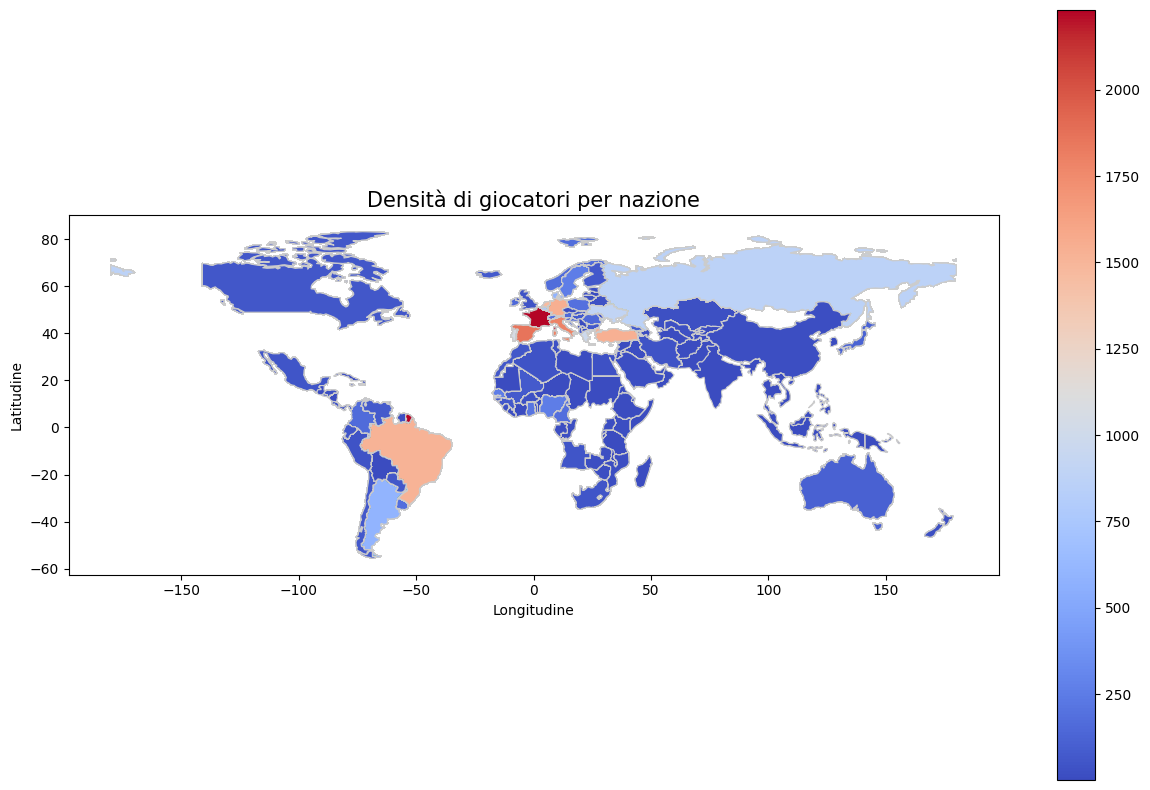

In [8]:
#Esegui l'aggregazione separatamente
agg_data = df_players_geo['player_id'].groupby(df_players_geo['country_of_birth']).count().reset_index()
agg_data.columns = ['country_of_birth', 'num_players']
print(agg_data)

# Unisci l'aggregazione con il tuo DataFrame
df_players_geo = pd.merge(df_players_geo, agg_data, on='country_of_birth', how='left')

# Disegna la mappa di calore
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Usa il metodo plot di GeoDataFrame per visualizzare la mappa di calore
df_players_geo.plot(column='num_players', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Aggiungi titolo e etichette
ax.set_title('Densità di giocatori per nazione', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Mostra la legenda
leg = ax.get_legend()
if leg is not None:
    leg.set_bbox_to_anchor((1, 0.5))

# Mostra il grafico
plt.savefig("../images/giocatori_per_nazione_mappacalore.png")
plt.show()



In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
#elimina = ["gol_totali", "presenze", "assist_totali", "ammonizioni_totali", "espulsioni_totali"]
#df_players.drop(columns=elimina, inplace=True)
#print(df_players)

In [11]:

#print("Sium 1")
#print(df_players)
#gol_totali_per_giocatore = df_goal_totali.groupby("name").size().reset_index(name="gol_totali")
#print("Sium 2")
#print(gol_totali_per_giocatore)
#df_players = pd.merge(df_players, gol_totali_per_giocatore, on="name", how="left")

presenze_per_giocatore = df_appearances.groupby("player_id").size().reset_index(name="presenze")
df_players = pd.merge(df_players, presenze_per_giocatore, left_on="player_id", right_on="player_id", how="left")

assist_totali = df_appearances.groupby("player_id")["assists"].sum().reset_index(name = "assist_totali")
df_players = pd.merge(df_players, assist_totali, left_on="player_id", right_on="player_id", how="left")

ammonizioni_totali = df_appearances.groupby("player_id")["yellow_cards"].sum().reset_index(name = "ammonizioni_totali")
df_players = pd.merge(df_players, ammonizioni_totali, left_on="player_id", right_on="player_id", how="left")

espulsioni_totali = df_appearances.groupby("player_id")["red_cards"].sum().reset_index(name = "espulsioni_totali")
df_players = pd.merge(df_players, espulsioni_totali, left_on="player_id", right_on="player_id", how="left")

#print("Sium 3")
print(df_players)
#print(df_players.columns())



       player_id                        name  last_season  current_club_id  \
0             10              Miroslav Klose         2015              398   
1             26          Roman Weidenfeller         2017               16   
2             65            Dimitar Berbatov         2015             1091   
3             77                       Lúcio         2012              506   
4             80                  Tom Starke         2017               27   
...          ...                         ...          ...              ...   
30329    1163778         Kahveh Zahiroleslam         2023              475   
30330    1166093  Georgios Konstantakopoulos         2023            30120   
30331    1173042                  Djibi Seck         2023              601   
30332    1176345            Mahamadou Nagida         2023              273   
30333    1186012              Bakary Haidara         2023              968   

                      player_code    country_of_birth         c

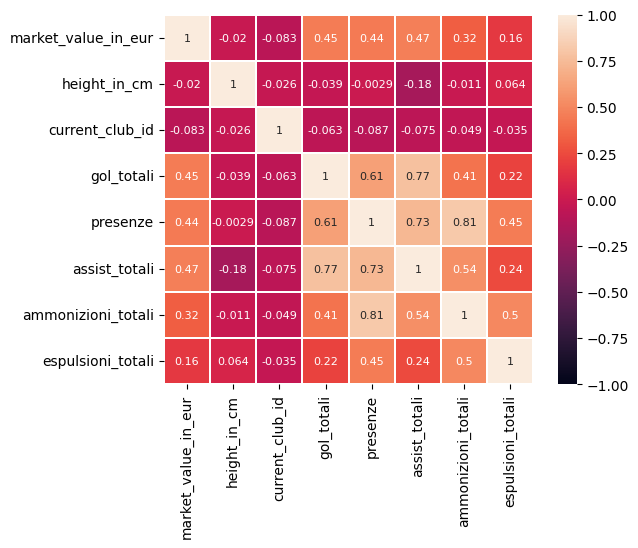

In [12]:
import seaborn as sns

correlazione = pd.merge(df_player_valuations[["market_value_in_eur", "player_id"]], df_players[["player_id", "height_in_cm", "current_club_id", "gol_totali", "presenze", "assist_totali", "ammonizioni_totali", "espulsioni_totali"]], how="inner", on="player_id")
numerical_columns = correlazione.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'player_id']

corr = correlazione[numerical_columns].corr()

annot_kws = {"size": 8}
sns.heatmap(corr,vmax=1, vmin=-1,square=True, annot=True, linewidths=.2, cbar=True, annot_kws=annot_kws)
plt.savefig("../images/correlazione_player.png")
plt.show()



In [13]:
%pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [95]:
#Mi serviva per fare un controllo
df_game_events = pd.read_csv(r"C:\Users\mikdr\OneDrive - Università Politecnica delle Marche\Data Science\ProgettoDS_PY\DataScience-Python\DataScience-Python\csv\game_events.csv")
#df_game_events["date"] = df_game_events["date"].astype(str)
#print(df_game_events["date"])

In [96]:
df_competitions = pd.read_csv(r"C:\Users\mikdr\OneDrive - Università Politecnica delle Marche\Data Science\ProgettoDS_PY\DataScience-Python\DataScience-Python\csv\competitions.csv")


In [97]:
#questo potrebbe essere messo in etl
from datetime import datetime
#print(str(type(df_game_events["date"])))
df_game_events["date"] = pd.to_datetime(df_game_events["date"])
print(df_game_events["date"])

0        2012-08-05
1        2012-08-05
2        2012-08-05
3        2012-08-05
4        2012-08-05
            ...    
674620   2023-12-19
674621   2023-12-19
674622   2023-12-19
674623   2023-12-19
674624   2023-12-19
Name: date, Length: 674625, dtype: datetime64[ns]


In [17]:
#print(df_game_events["date"])

In [18]:
#pd.set_option('display.max_row', None)
#print(df_game_events[["date", "type", "game_id"]])


C:\Users\mikdr\AppData\Local\Temp\ipykernel_19712\2424326948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro["goals"] = 1
C:\Users\mikdr\AppData\Local\Temp\ipykernel_19712\2424326948.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro["year"] = df_filtro["date"].dt.year
C:\Users\mikdr\AppData\Local\Temp\ipykernel_19712\2424326948.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<Figure size 1000x600 with 0 Axes>

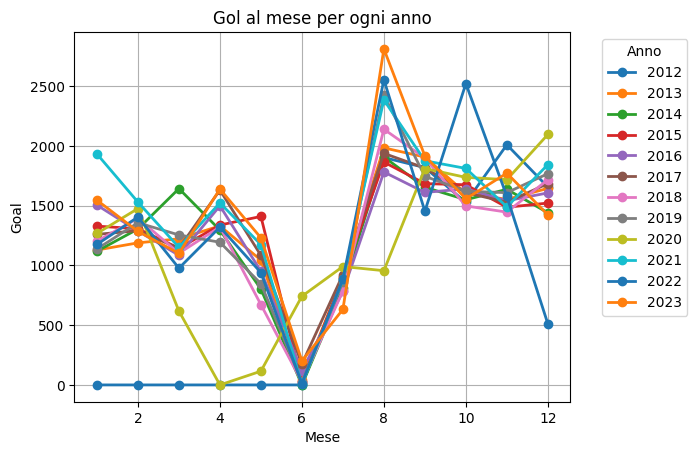

In [98]:
#nel dataset manca sicuro il giugno 2022, e fino a giugno del 2012 (kaggle), gli altri mesi su kaggle ci sono ma qui no
#print(df_game_events["date"].where((df_game_events["type"] == "Goals") & (df_game_events["date"] != "Sconosciuto")).groupby(df_game_events["date"]).count())

df_filtro = df_game_events.loc[(df_game_events["type"] == "Goals")]
df_filtro["goals"] = 1
#print(df_filtro)

# Converti la colonna "date" in un oggetto datetime, gestendo gli errori
#df_filtro["date"] = pd.to_datetime(df_filtro["date"], errors='coerce')

# Estrai l'anno dalla colonna di data
df_filtro["year"] = df_filtro["date"].dt.year
df_filtro["month"] = df_filtro["date"].dt.month
# Rimuovi le righe con anno mancante (NaN)
#df_filtro = df_filtro.dropna(subset=["year"])
#df_filtro = df_filtro.dropna(subset=["month"])

monthly_goals = df_filtro.groupby(["month", "year"])["goals"].sum().reset_index()
#print(df_game_events[["date", "type"]])
#print(monthly_goals.where((monthly_goals["year"] == 2022) & (monthly_goals["month"] == 1)))

pivot_table = monthly_goals.pivot(index='month', columns='year', values='goals').fillna(0)

# Crea un grafico a linee con una linea per ogni anno
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='line', marker='o', linestyle='-', linewidth=2)
plt.title('Gol al mese per ogni anno')
plt.xlabel('Mese')
plt.ylabel('Goal')
plt.legend(title='Anno', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig("../images/gol_mensili_per_anno.png")
plt.show()


Game events: 
                           game_event_id       date  game_id  minute  \
0       2f41da30c471492e7d4a984951671677 2012-08-05  2211607      77   
1       a72f7186d132775f234d3e2f7bc0ed5b 2012-08-05  2211607      77   
2       b2d721eaed4692a5c59a92323689ef18 2012-08-05  2211607       3   
3       aef768899cedac0c9a650980219075a2 2012-08-05  2211607      53   
4       5d6d9533023057b6619ecd145a038bbe 2012-08-05  2211607      74   
...                                  ...        ...      ...     ...   
674620  30e3fa6fcd46869433fe8338923318e0 2023-12-19  4243187      65   
674621  6102c807df4f76367dfb6ae66a52b45c 2023-12-19  4243187      57   
674622  c6d396c0d23982f312a1a5fe2eb0d37a 2023-12-19  4243187      83   
674623  f4c9271ed78bc0b9c3014d2e402d3a9f 2023-12-19  4243187      64   
674624  0fad3afd3ef0cb67d8924c7737fdc36a 2023-12-19  4243187      57   

                 type  club_id  player_id  \
0               Cards      610       4425   
1               Cards      383 

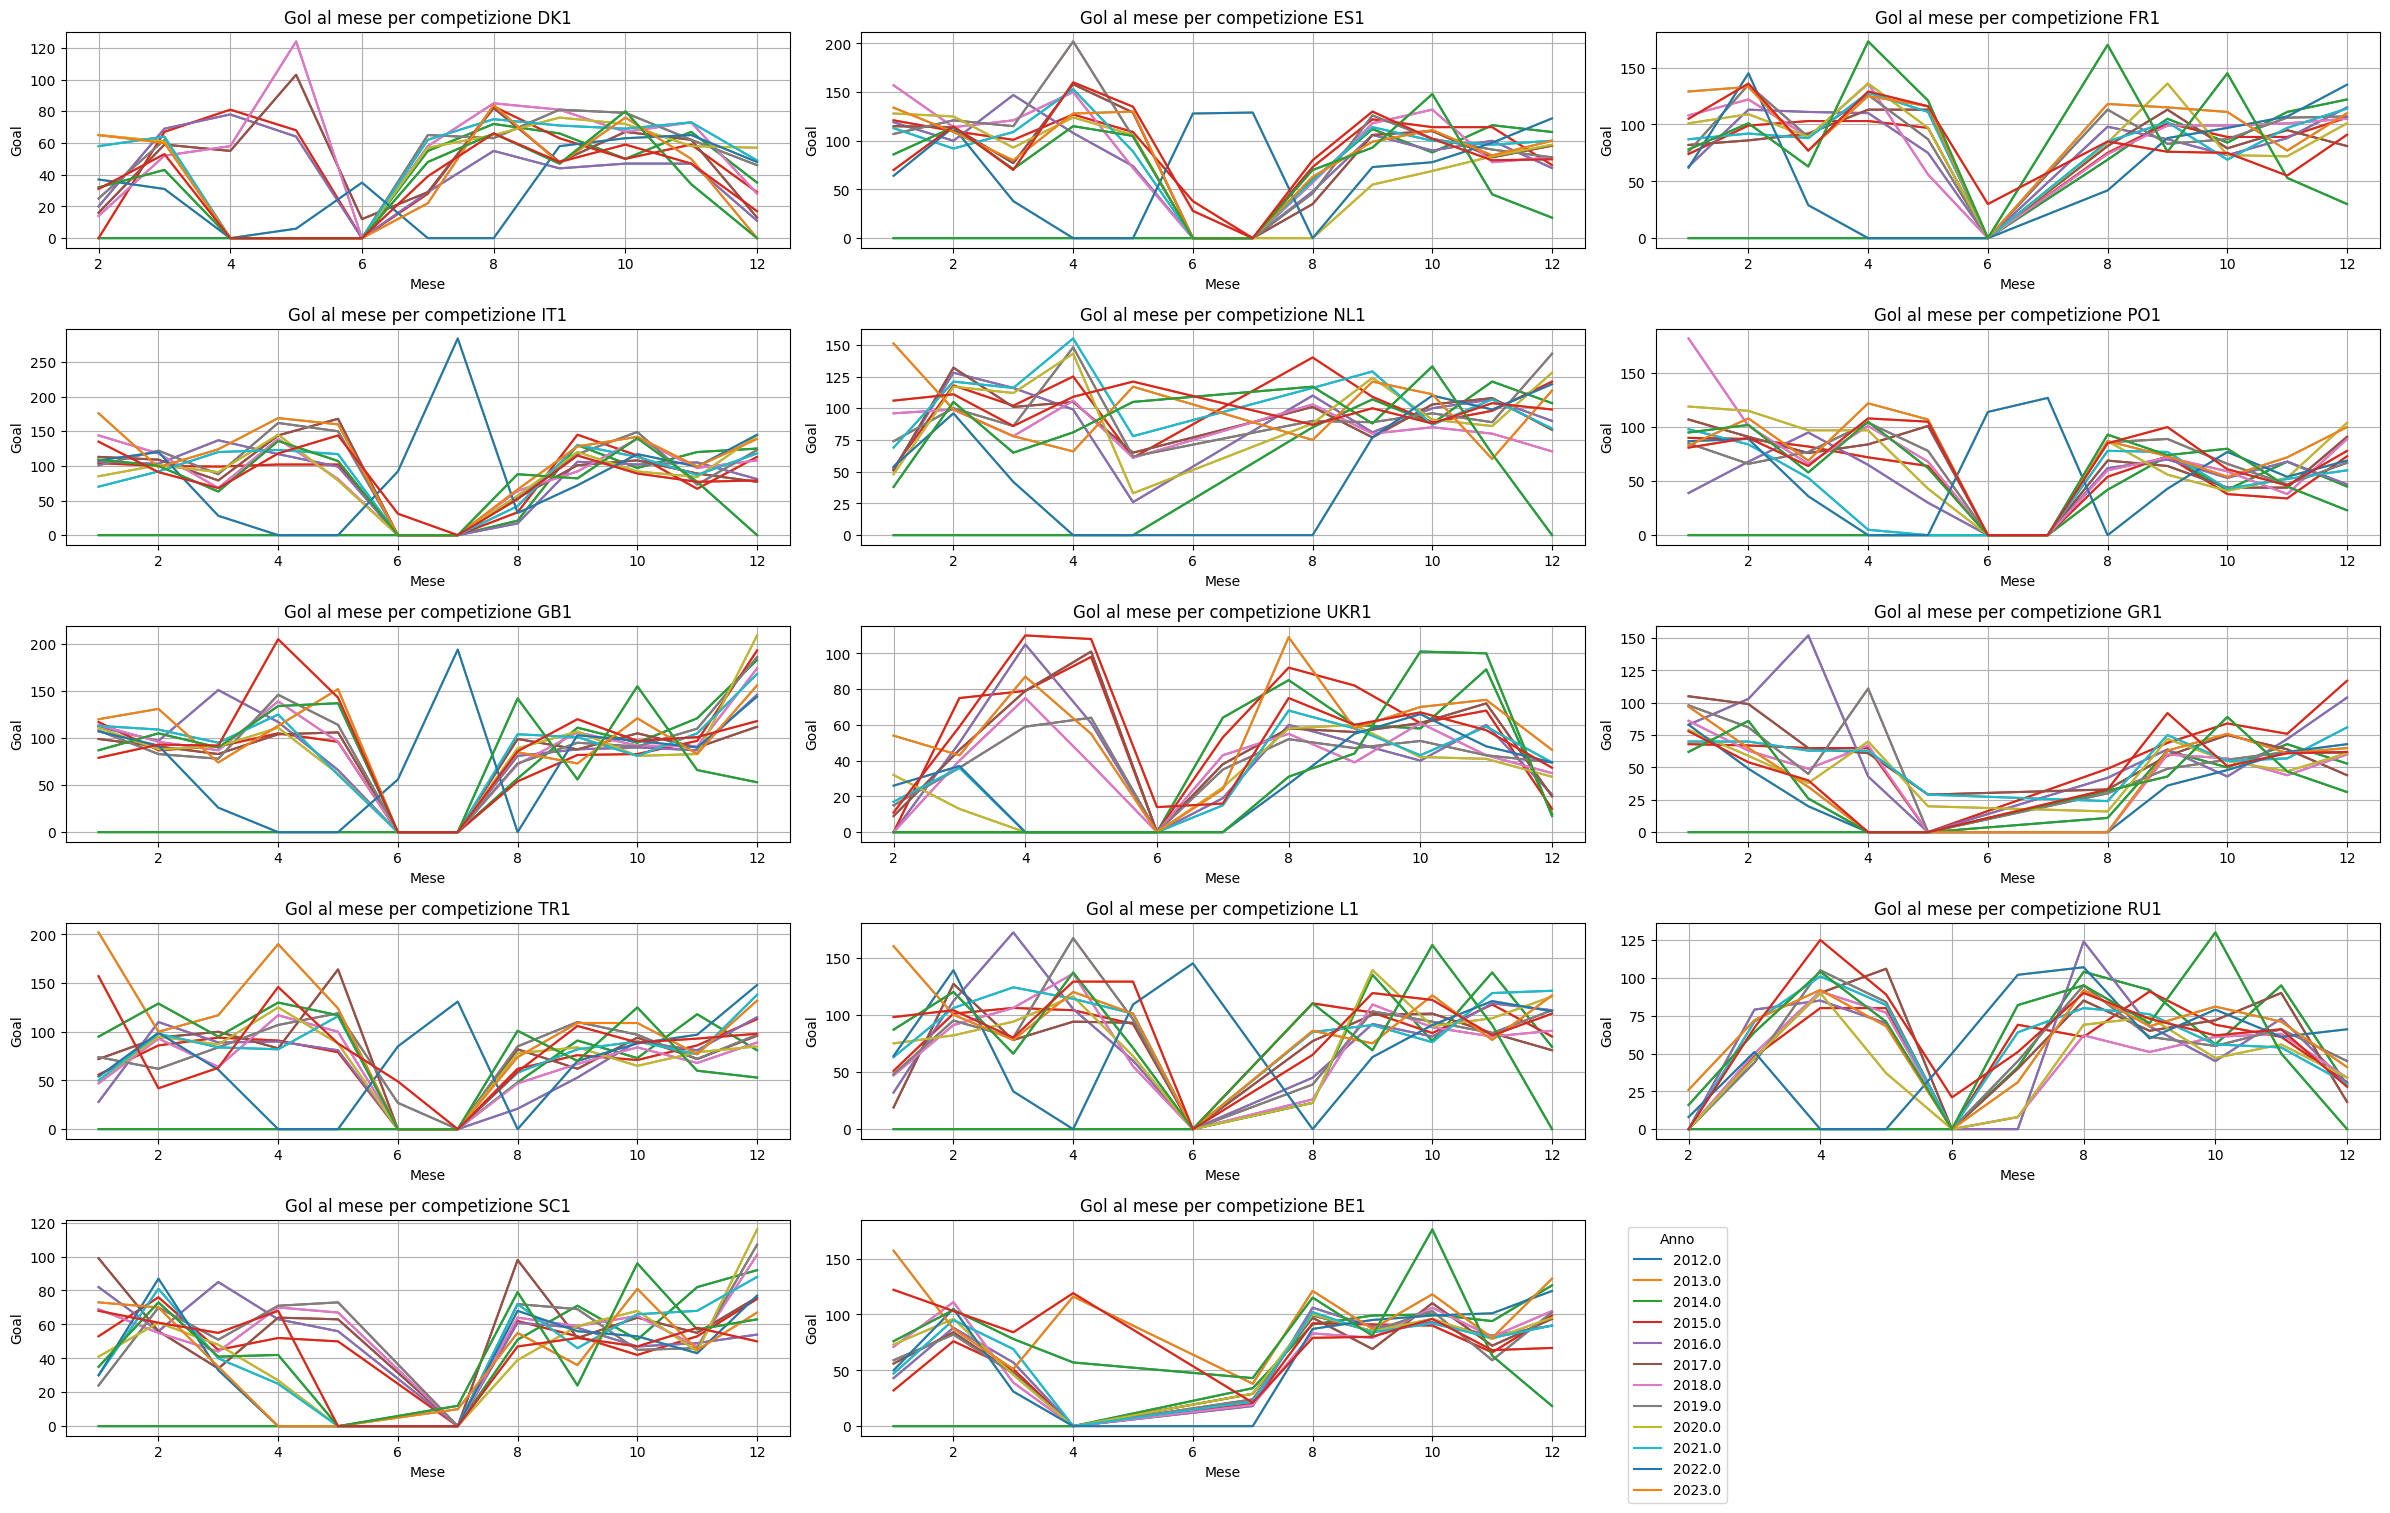

In [112]:
#df_filtro = df_game_events.loc[(df_game_events["type"] == "Goals")]
#df_filtro["goals"] = 1
#print(df_filtro)

# Converti la colonna "date" in un oggetto datetime, gestendo gli errori
#df_filtro["date"] = pd.to_datetime(df_filtro["date"], errors='coerce')

# Estrai l'anno dalla colonna di data
#df_filtro["year"] = df_filtro["date"].dt.year
#df_filtro["month"] = df_filtro["date"].dt.month
print("Game events: ")
print(df_game_events)
df_ge_g = pd.merge(df_game_events.where(df_game_events["type"] == "Goals"), df_games[["game_id", "competition_id"]], on = "game_id", how = "right")
df_ge_g["month"] = df_ge_g["date"].dt.month
df_ge_g["year"] = df_ge_g["date"].dt.year
df_ge_g["goals"] = 1
print("df_ge_g: ")
print(df_ge_g.head())
print("Competizioni: ")
print(df_competitions)
df_gol_competizioni = pd.merge(df_competitions.where(df_competitions["sub_type"] == "first_tier"),df_ge_g, on = "competition_id", how = "inner")
print("Gol competizioni: ")
print(df_gol_competizioni)
df_gol_competizioni = df_gol_competizioni.groupby(["competition_id","month", "year"])["goals"].sum().reset_index()
print("Gol competizioni groupby: ")
print(df_gol_competizioni)

# Crea una singola figura fuori dal loop
plt.figure(figsize=(24, 15))
i = 0
for index, row in df_competitions.iterrows():
    if row["sub_type"] == "first_tier":
        i = i+ 1
        print(row)
        competition_id = row["competition_id"]

        # Filtra il DataFrame solo per la competizione corrente
        df_competition = df_ge_g[df_ge_g["competition_id"] == competition_id]

        # Calcola i gol mensili per ogni anno
        monthly_goals = df_competition.groupby(["month", "year"])["goals"].sum().reset_index()

        # Crea una pivot table per i gol mensili
        pivot_table = monthly_goals.pivot(index='month', columns='year', values='goals').fillna(0)

        # Crea un sottografo dinamicamente in base alla dimensione della griglia
        plt.subplot(5, 3, i)
        for column in pivot_table.columns:
            plt.plot(pivot_table.index, pivot_table[column], label=column)

        plt.plot(pivot_table)
        
        # Aggiungi etichette e titolo
        plt.title(f'Gol al mese per competizione {competition_id}')
        plt.xlabel('Mese')
        plt.ylabel('Goal')
        
        plt.grid(True)

# Regola il layout per evitare sovrapposizioni
plt.tight_layout()
plt.legend(title='Anno', bbox_to_anchor=(1.05, 1), loc='upper left')

# Salva il grafico come immagine e visualizzalo
plt.savefig("../images/gol_mensili_per_competizione.png")
plt.show()